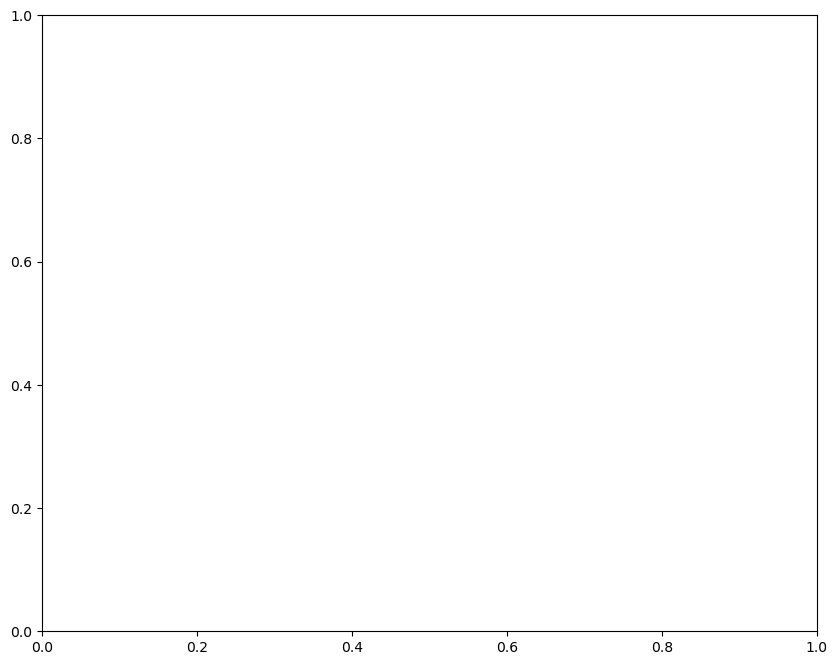

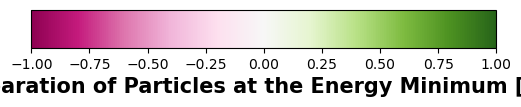

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})
# Define the symlog function
def symlog(x, linthresh=1):
    is_negative = x < 0
    abs_x = np.abs(x)
    abs_x = np.where(abs_x < linthresh, 0, np.log10(abs_x))
    return np.where(is_negative, -abs_x, abs_x)

# Define the potential function in HOOMD Blue units
def potential(x, u, qi_qj_ratio, k, s):
    # The potential function, adjusted for the provided units
    # qi_qj_ratio is unitless
    # u is in kJ/mol, x in nm, k in 1/nm, s in nm
    screened_coulomb = (qi_qj_ratio * np.exp(-k * x)) / x
    lennard_jones = 4 * u * ((s / x)**12 - (s / x)**6)
    return screened_coulomb + lennard_jones

# Function to find the minimum x of the potential
def find_potential_minimum(u, qi_qj_ratio, k, s):
    # Minimize the potential function to find the minimum x value
    result = minimize_scalar(potential, bounds=(0.1, 5), args=(u, qi_qj_ratio, k, s), method='bounded')
    return result.x  # Return the seperation at which the potential is minimum

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 8))
S_values = np.linspace(0.1, 25, 100)  # S in nm
qi_qj_ratios = np.array([-1E6, -1E5, -1E4, -1E3, -100, -50, -10, -5, -1, -0.5, 0, 0.5, 1, 5, 10, 50, 100, 1E3, 1E4, 1E5, 1E6])  # qi/qj ratios
S, Q = np.meshgrid(S_values, qi_qj_ratios, indexing='ij')

# Function to update the plot for each frame when animating k
def animate_k(frame):
    u = 1
    k = 0.1 + (15 - 0.01) * (frame / 99)  # Vary k from 0.1 to 1.5 over 100 frames
    # Calculate XMin - S
    X_min_diff = np.array([[find_potential_minimum(u, ratio, k, s) - s for ratio in qi_qj_ratios] for s in S_values])
    ax.clear()
    # Plot the difference in x values
    contour = ax.contourf(S, symlog(Q), X_min_diff, levels=100, cmap='PiYG')
    ax.set_xlabel('Sum Radii $r_i+r_j$ [nm]')  # Updated label
    ax.set_ylabel('Log Charge product $q_i*q_j$ [Elem. Charge$^2$]')  # Updated label
    ax.set_title(f'Favored Particle Spacing, Varying Screening Length=1/{k:.2f} [nm]')
    return contour,

# Function to update the plot for each frame when animating u
def animate_u(frame):
    k = 1.28
    u = 0.1 + (100 - 0.01) * (frame / 99 )  # Vary u from 0.1 to 10.0 over 100 frames
    # Calculate XMin - S
    X_min_diff = np.array([[find_potential_minimum(u, ratio, k, s) - s for ratio in qi_qj_ratios] for s in S_values])
    ax.clear()
    # Plot the difference in x values
    contour = ax.contourf(S, symlog(Q), X_min_diff, levels=100, cmap='PiYG')
    ax.set_xlabel('Sum Radii $r_i+r_j$ [nm]')  # Updated label
    ax.set_ylabel('Log Charge product $q_i*q_j$ [Elem. Charge$^2$]')  # Updated label
    ax.set_title(f'Favored Particle Spacing, Varying $\epsilon$ = {u:.2f} [kJ/mol]')  # Updated title
    return contour,

# Create the animation
#ani_k = FuncAnimation(fig, animate_k, frames=25, interval=100)

# Save the animation as a gif
#ani_k.save('varying_k_Norm.gif', writer='pillow', dpi=100)

# Create the animation
#ani_u = FuncAnimation(fig, animate_u, frames=25, interval=100)

# Save the animation as a gif
#ani_u.save('varying_u_Norm.gif', writer='pillow', dpi=100)

# Create a separate legend color bar
min_diff = -1  # minimum possible value of (XMin - S)
max_diff = 1  # maximum possible value of (XMin - S)

# Create a figure for the color bar
fig_colorbar, ax_colorbar = plt.subplots(figsize=(6, 1))
fig_colorbar.subplots_adjust(bottom=0.5)

# Set the colormap and normalize to the range of (XMin - S) values
cmap_colorbar = mpl.cm.PiYG
norm_colorbar = mpl.colors.Normalize(vmin=min_diff, vmax=max_diff)

cb_colorbar = mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap_colorbar, norm=norm_colorbar, orientation='horizontal')
cb_colorbar.set_label('Separation of Particles at the Energy Minimum [nm]')

# Save the colorbar figure as an image
fig_colorbar.savefig('colorbar.png', dpi=300)

plt.show()


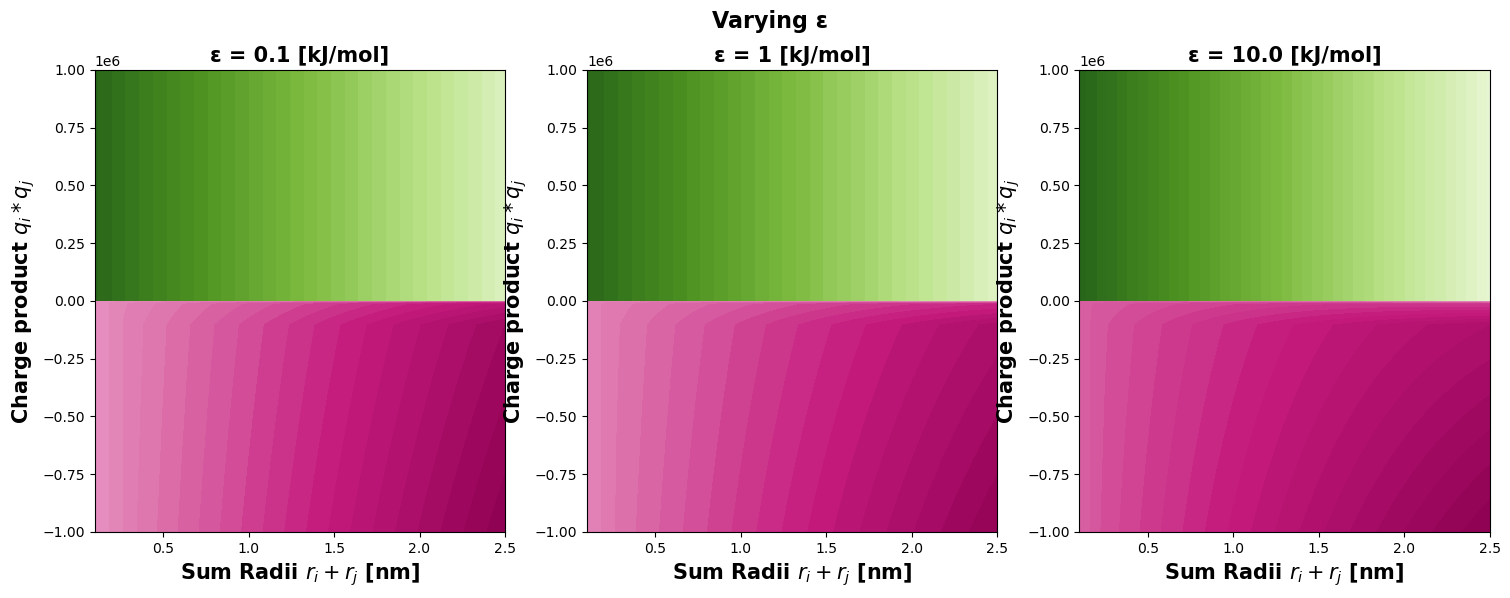

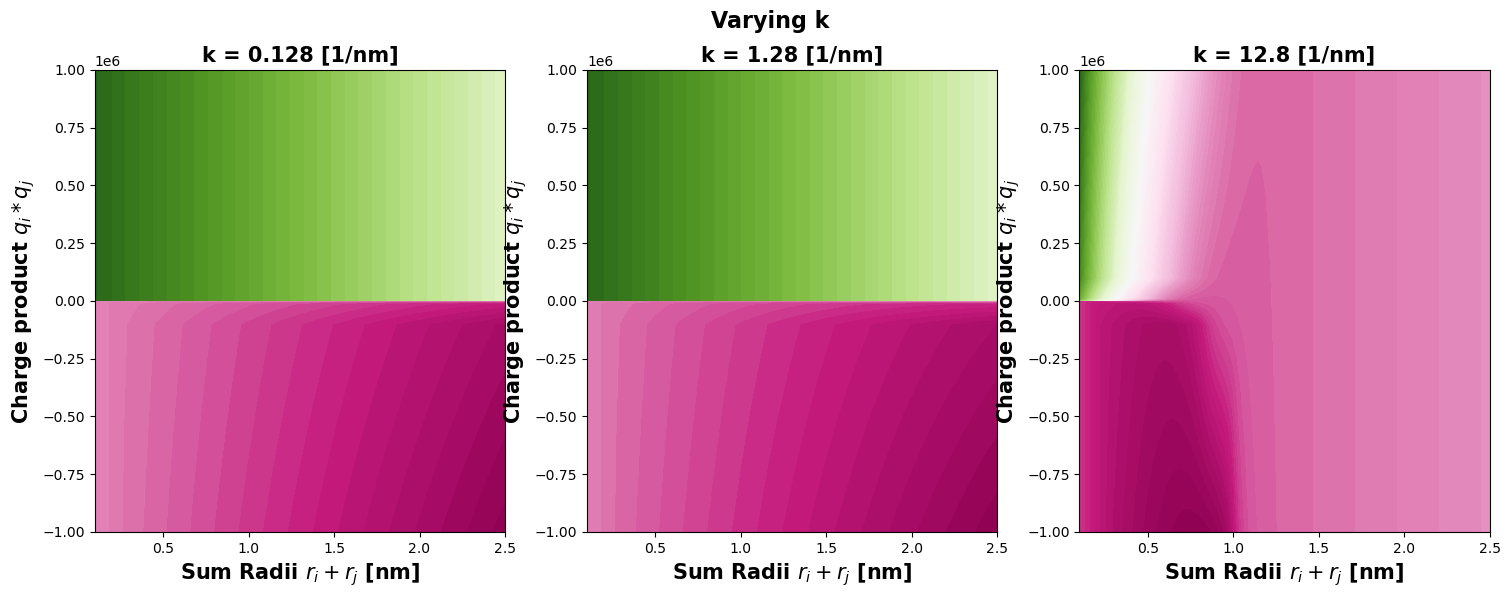

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 15,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 15,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 12  # Set the legend font size
})

def potential(x, u, qi_qj_ratio, k, s):
    screened_coulomb = (qi_qj_ratio * np.exp(-k * x)) / x
    lennard_jones = 4 * u * ((s / x)**12 - (s / x)**6)
    return screened_coulomb + lennard_jones

def find_potential_minimum(u, qi_qj_ratio, k, s):
    result = minimize_scalar(potential, bounds=(0.1, 5), args=(u, qi_qj_ratio, k, s), method='bounded')
    return result.x

def generate_corrected_plots(u_values, k_values, S_values, qi_qj_ratios):
    fig_eps, axs_eps = plt.subplots(1, 3, figsize=(18, 6))
    fig_eps.suptitle('Varying ε', fontsize=16, fontweight='bold')
    fig_k, axs_k = plt.subplots(1, 3, figsize=(18, 6))
    fig_k.suptitle('Varying k', fontsize=16, fontweight='bold')
    S_mesh, Q_mesh = np.meshgrid(S_values, qi_qj_ratios)
    for ax, u in zip(axs_eps, u_values):
        X_min_diff = np.array([[find_potential_minimum(u, Q_mesh[i, j], 1.0, S_mesh[i, j]) - S_mesh[i, j] for j in range(len(S_values))] for i in range(len(qi_qj_ratios))])
        ax.contourf(S_mesh, Q_mesh, X_min_diff, levels=100, cmap='PiYG')
        ax.set_title(f'ε = {u} [kJ/mol]')
        ax.set_xlabel('Sum Radii $r_i+r_j$ [nm]')
        ax.set_ylabel('Charge product $q_i*q_j$')
    for ax, k in zip(axs_k, k_values):
        X_min_diff = np.array([[find_potential_minimum(1.0, Q_mesh[i, j], k, S_mesh[i, j]) - S_mesh[i, j] for j in range(len(S_values))] for i in range(len(qi_qj_ratios))])
        ax.contourf(S_mesh, Q_mesh, X_min_diff, levels=100, cmap='PiYG')
        ax.set_title(f'k = {k} [1/nm]')
        ax.set_xlabel('Sum Radii $r_i+r_j$ [nm]')
        ax.set_ylabel('Charge product $q_i*q_j$')
        fig_eps.savefig('varying_epsilon.png', format='png'); fig_k.savefig('varying_k.png', format='png')
    plt.show()

S_values = np.linspace(0.1, 2.5, 100)
qi_qj_ratios = np.array([-1E6, -1E5, -1E4, -1E3, -100, -50, -10, -5, -1, -0.5, 0, 0.5, 1, 5, 10, 50, 100, 1E3, 1E4, 1E5, 1E6])
u_values = [0.1, 1, 10.0]
k_values = [0.128, 1.28, 12.8]

generate_corrected_plots(u_values, k_values, S_values, qi_qj_ratios)



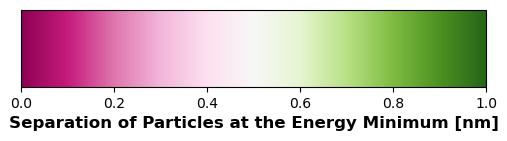

In [11]:
# Increase the font size and bold the text for titles and axis labels globally
plt.rcParams.update({
    'axes.titlesize': 14,  # Increase the font size of the title
    'axes.titleweight': 'bold',  # Bold the title font
    'axes.labelsize': 12,  # Increase the font size of the axis labels
    'axes.labelweight': 'bold',  # Bold the axis label font
    'grid.alpha': 0.5,  # Set grid line transparency
    'legend.fontsize': 10  # Set the legend font size
})

plt.colorbar(plt.cm.ScalarMappable(cmap='PiYG'), cax=plt.subplots(figsize=(6, 1))[1], orientation='horizontal').set_label('Separation of Particles at the Energy Minimum [nm]'); plt.savefig('colorbar.png', format='png')
